In [1]:
# import libraries

import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


In [2]:
# importing the file path that represents the location on the computer where the Instacart Basket Analysis is stored
path = r'C:\Users\rdpor\anaconda3\Scripts\Instacart Basket Analysis'

   1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
   This should be the merged version of your data that contains the new customers column.

In [3]:
# importing the merged_df pickle file from 4.9 part 1 this is the one that has the merged version of data 
# from the new customers column that was created in 4.9 part 1
merged_df = pd.read_pickle(r'C:\Users\rdpor\anaconda3\Scripts\Instacart Basket Analysis\02 Data\Prepared Data\merged_df.pkl')



In [4]:
merged_df.shape

(32434212, 31)

In [5]:
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 31 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int32  
 1   user_id                 int32  
 2   order_number            int32  
 3   orders_day_of_week      int32  
 4   order_hour_of_day       int32  
 5   days_since_prior_order  float64
 6   product_id              int32  
 7   add_to_cart_order       int32  
 8   reordered               int32  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  busiest_day             object 
 15  busiest_days            object 
 16  max_order               int32  
 17  loyalty_flag            object 
 18  average_price           float64
 19  spending_flag           object 
 20  median_orders           float64
 21  order_frequency_flag    objec

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

 #personally identifiable information, so which  columns go with personal info and be sensitive 
    # with them. how do you plan on being sensitive with them? 
    # Particularly sensitive are names, email addresses, physical addresses, and phone numbers.
    # When in doubt, always inform a senior colleague or whoever is responsible for
    data security in your organization. In smaller companies, you’ll sometimes be asked
    to delete, or “scrub,” the problematic columns and carry on with the rest of your analysis.
    While not advisable, don’t be surprised if it happens. confirm the columns
    
    Order number is potentially sensitive 
    first name
    last name / surname
    date joined 
    number of dependents
    marital status 
    income

3.  QUESTION: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.  Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).  Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [7]:

# What this code is doing is taking each state in the merged_df 
# and checking which region it belongs to based off the predefined lists of states for each region
# Then it appends, this is a way of categorizing states based of region

region = []

for value in merged_df["state"]:
  if value == 'Maine' or value == 'New Hampshire' or value == 'Vermont' or value == 'Massachusetts' or value == 'Rhode Island' or value == 'Connecticut' or value == 'New York' or value == 'Pennsylvania' or value == 'New Jersey':
    region.append("Northeast")
  elif value == 'Wisconsin' or value == 'Michigan' or value == 'Illinois' or value == 'Indiana' or value == 'Ohio' or value == 'North Dakota' or value == 'South Dakota' or value == 'Nebraska' or value == 'Kansas' or value == 'Minnesota' or value == 'Iowa' or value == 'Missouri':
    region.append("Midwest")
  elif value == 'Delaware' or value == 'Maryland' or value == 'District of Colombia' or value == 'Virginia' or value == 'West Virginia' or value == 'North Carolina' or value == 'South Carolina' or value == 'Georgia' or value == 'Florida' or value == 'Kentucky' or value == 'Tennessee' or value == 'Mississippi' or value == 'Alabama' or value == 'Oklahoma' or value == 'Texas' or value == 'Arkansas' or value == 'Lousiana':
    region.append("South")
  else:
    region.append("West")

In [8]:
# This is adding the newly created "region" column to the "merged_df" data frame. 
merged_df['region'] = region

In [9]:
# This is the data frame with the new "region" column 
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first name,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South


In [10]:

#this is counting how many times each region appears in the merged_df data frame
merged_df['region'].value_counts(dropna=False)

West         9552912
South        9549143
Midwest      7603810
Northeast    5728347
Name: region, dtype: int64

In [11]:
# This  is counting how many times each unique value appears 
# in the "spending_flag" column of the "merged_df" data frame.
# it also includes any missing values.  This info helps to 
# understand how many customers fall into each spending category
# It also gives insight into distribution of spending habits among customers

merged_df['spending_flag'].value_counts(dropna=False)

Low spender     31798751
High spender      635461
Name: spending_flag, dtype: int64

In [12]:

# with this line of code we are using the crosstab() function to take the 'region' column 
# and the 'spending_flag' column and take them both from the dataframe 'merged_df' then 
#we are creating a table that shows how many customers fall into each combination of region and 
# spending habit.  Also, this can help us understand the spending habits of customers in different regions
# more clearly. 
regional_spending_habits = pd.crosstab(merged_df['region'], merged_df['spending_flag'], dropna = False)

In [13]:
# now seeing what the regional_spending_habits are
regional_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,156129,7447681
Northeast,108343,5620004
South,187174,9361969
West,183815,9369097


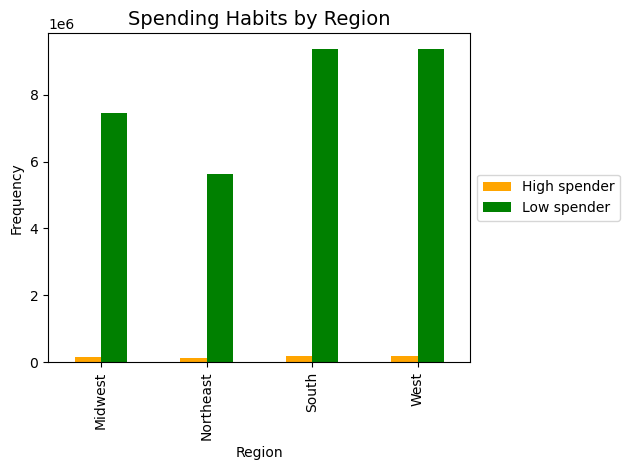

In [14]:
# This code below generates a bar plot showing
# the distribution of spending habits across different regions. 
# The plot has labels for the x and y axes, a title, 
# and a legend for easy interpretation. The tight_layout() function 
# ensures that the plot is well-arranged and fits nicely within the figure area.


bar_regional_spending_habit=regional_spending_habits.plot.bar(color=['orange','green'])
plt.xlabel("Region")
plt.ylabel("Frequency")
plt.title("Spending Habits by Region", fontsize=14)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.tight_layout()

In [15]:

# What this code is doing is saving the previously created bar plot as an image file 
# with the name 'spending_habit_by_region'
bar_regional_spending_habit.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_habit_by_region.png'))

3. ANSWER: We can see that in the south and in the west the low spender has a higher frequency of spending. It also
looks like kin the Northeast the high spender is the lowest

4. QUESTION: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.


In [16]:
# So, in simple terms, this code 
# is creating a new column in the DataFrame 'merged_df'
# that categorizes customers based on their activity level.
# Customers with five or more orders are labeled as 'High activity customers',
# while those with fewer than five orders are labeled as 'Low activity customers'.
# This can help in identifying and analyzing customer behavior and engagement with the business.

merged_df.loc[merged_df['max_order']>= 5, 'customer_activity'] = 'High activity customer'
merged_df.loc[merged_df['max_order']< 5, 'customer_activity'] = 'Low activity customer'

In [17]:


# this code is using the value_counts() function 
# to count how many times each unique value appear in the
#'customer_activity' column of the dataframe.  
# It essentially tells us how many customers are classified 
# as having high activity and how many are
# classified as having low activity, which
# helps us understand the distribution of 
# customer activity levels in the dataset.


merged_df['customer_activity'].value_counts (dropna = False) 

High activity customer    30992664
Low activity customer      1441548
Name: customer_activity, dtype: int64

In [18]:
# note, this is an issue you have 5 rows here but on the cell below when you go through and create the data frame you don't have
# any rows
merged_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High activity customer


In [19]:

# this line of code creates a new DataFrame called 
# 'low_activity_customers_df', which contains only the
# rows from the original DataFrame 'merged_df'
# where the 'customer_activity' is labeled as 
# 'low activity customer'. In other words, it 
# filters and selects only the data related to
# customers with low activity levels, allowing 
# for a more focused analysis on this specific group of customers.

# # ***Note why are these not showing up any rows ???

low_activity_customers_df = merged_df[merged_df['customer_activity'] == 'low activity customer']

In [20]:
# checking the rows and columns ***Note: I'm not sure why there aren't any rows. why did the rows decrease from 5 rows to 0?
low_activity_customers_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,surname,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity


In [21]:
# checking the shape.  ***Note: why is the rows column have a value of 0? 
low_activity_customers_df.shape

(0, 33)

In [22]:
# note: this was code that was fixed from chat gpt when I had the original code written similar to this it had some errors
low_activity_customers_df.to_pickle(os.path.join(path, '02 Data', 'prepared data', 'low_activity_customers.pkl'))


In [23]:
# In summary, the code is assigning regions to each
# state based on predefined mappings and then adding 
# this region information as a new column in the DataFrame.
# This can be helpful for analyzing and categorizing data
# based on different geographical regions.

import pandas as pd

# Sample DataFrame with the states in the 'state' column
data = {'state': ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey', 'Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri', 'Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana', 'Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']}
df = pd.DataFrame(data)

# Dictionary mapping each state to its corresponding region
region_mapping = {
    "Northeast": ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
    "Midwest": ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
    "South": ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
    "West": ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']
}



# Function to assign regions based on the state
def assign_region(state):
    for region, states in region_mapping.items():
        if state in states:
            return region
    return "Other"

# Applying the assign_region function using groupby
df['Region'] = df['state'].apply(assign_region)

# Displaying the DataFrame with the assigned regions
print(df)


                   state     Region
0                  Maine  Northeast
1          New Hampshire  Northeast
2                Vermont  Northeast
3          Massachusetts  Northeast
4           Rhode Island  Northeast
5            Connecticut  Northeast
6               New York  Northeast
7           Pennsylvania  Northeast
8             New Jersey  Northeast
9              Wisconsin    Midwest
10              Michigan    Midwest
11              Illinois    Midwest
12               Indiana    Midwest
13                  Ohio    Midwest
14          North Dakota    Midwest
15          South Dakota    Midwest
16              Nebraska    Midwest
17                Kansas    Midwest
18             Minnesota    Midwest
19                  Iowa    Midwest
20              Missouri    Midwest
21              Delaware      South
22              Maryland      South
23  District of Columbia      South
24              Virginia      South
25         West Virginia      South
26        North Carolina    

In [24]:
# These lists are used later in the code to assign
# each state in the DataFrame to its corresponding 
# geographical region. By defining these lists, the
# code makes it easier to categorize and organize
# states into specific regions based on their geographical locations.

Northeast =['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey'],
Midwest =['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri'],
South =['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'],
West =['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']


In [25]:
# In simpler terms, this code is locating the rows
# in the DataFrame merged_df where the 'state' is 
# in the list of states in the Northeast of the United States,
# and it's assigning the value 'Northeast' to the 'Region'
# column for those particular rows. This allows the code to 
# categorize and label the states in the DataFrame based on
# their geographical regions, making it easier to perform
# analyses and visualizations based on these categories.

merged_df.loc[merged_df['state'].isin(Northeast), 'Region'] = 'Northeast'

In [26]:
# In simpler terms, this line of code counts 
# the occurrences of each unique region in the
# 'Region' column of the DataFrame 'merged_df'
# . It helps in understanding the distribution
# of data points across different regions, 
# providing insights into the prevalence of
# specific regions within the dataset.

merged_df.Region.value_counts()

Series([], Name: Region, dtype: int64)

In [27]:
# this line of code selects
# rows from the DataFrame 'merged_df' where the
# 'state' column contains any value that is present
# in the list or array 'South'. The code filters the 
# DataFrame to show only the rows where the state is 
# one of the states listed in the 'South' list or array.

merged_df.loc[merged_df['state'].isin(South)]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity,Region


In [28]:
# this line of code is displaying 
# the last 50 rows of the DataFrame 'merged_df'. 
# It helps in examining the tail end of the DataFrame,
# particularly the most recent or last entries, providing
# insights into the data at the end of the dataset.

merged_df.tail(50)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,customer_activity,Region
32434162,774135,11534,12,1,13,7.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,...,Female,Delaware,69,2/20/2018,0,divorced/widowed,103023,South,High activity customer,NaN
32434163,1280763,105857,1,1,22,NaN,23767,1,0,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434164,593283,105857,2,6,21,12.0,23767,1,1,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434165,2645685,105857,3,2,22,10.0,23767,1,1,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434166,2934579,105857,4,3,2,8.0,23767,1,1,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434167,1654464,105857,5,3,22,7.0,23767,1,1,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434168,2494306,105857,6,5,21,9.0,23767,1,1,Imported Light Beer,...,Female,Oregon,28,8/28/2019,2,married,48873,West,High activity customer,NaN
32434169,3320476,38979,1,1,11,NaN,13128,1,0,Purified Alkalkine Water with Minerals pH10,...,Female,Indiana,57,12/15/2019,1,married,135623,Midwest,Low activity customer,NaN
32434170,2054093,38979,2,1,10,7.0,13128,1,1,Purified Alkalkine Water with Minerals pH10,...,Female,Indiana,57,12/15/2019,1,married,135623,Midwest,Low activity customer,NaN
32434171,3292079,38979,3,1,11,7.0,13128,1,1,Purified Alkalkine Water with Minerals pH10,...,Female,Indiana,57,12/15/2019,1,married,135623,Midwest,Low activity customer,NaN


In [29]:
# then create spending flag here